In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [23]:
data=pd.read_csv("Student Depression Dataset.csv")
data

id  Gender   Age           City Profession  Academic Pressure  \
0           2    Male  33.0  Visakhapatnam    Student                5.0   
1           8  Female  24.0      Bangalore    Student                2.0   
2          26    Male  31.0       Srinagar    Student                3.0   
3          30  Female  28.0       Varanasi    Student                3.0   
4          32  Female  25.0         Jaipur    Student                4.0   
...       ...     ...   ...            ...        ...                ...   
27896  140685  Female  27.0          Surat    Student                5.0   
27897  140686    Male  27.0       Ludhiana    Student                2.0   
27898  140689    Male  31.0      Faridabad    Student                3.0   
27899  140690  Female  18.0       Ludhiana    Student                5.0   
27900  140699    Male  27.0          Patna    Student                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0                0.0  8.97                 2.0               0.0   
1                0.0  5.90                 5.0               0.0   
2                0.0  7.03                 5.0               0.0   
3                0.0  5.59                 2.0               0.0   
4                0.0  8.13                 3.0               0.0   
...              ...   ...                 ...               ...   
27896            0.0  5.75                 5.0               0.0   
27897            0.0  9.40                 3.0               0.0   
27898            0.0  6.61                 4.0               0.0   
27899            0.0  6.88                 2.0               0.0   
27900            0.0  9.24                 1.0               0.0   

          Sleep Duration Dietary Habits    Degree  \
0              5-6 hours        Healthy   B.Pharm   
1              5-6 hours       Moderate       BSc   
2      Less than 5 hours        Healthy        BA   
3              7-8 hours       Moderate       BCA   
4              5-6 hours       Moderate    M.Tech   
...                  ...            ...       ...   
27896          5-6 hours      Unhealthy  Class 12   
27897  Less than 5 hours        Healthy       MSc   
27898          5-6 hours      Unhealthy        MD   
27899  Less than 5 hours        Healthy  Class 12   
27900  Less than 5 hours        Healthy       BCA   

      Have you ever had suicidal thoughts ?  Work/Study Hours  \
0                                       Yes               3.0   
1                                        No               3.0   
2                                        No               9.0   
3                                       Yes               4.0   
4                                       Yes               1.0   
...                                     ...               ...   
27896                                   Yes               7.0   
27897                                    No               0.0   
27898                                    No              12.0   
27899                                   Yes              10.0   
27900                                   Yes               2.0   

       Financial Stress Family History of Mental Illness  Depression  
0                   1.0                               No           1  
1                   2.0                              Yes           0  
2                   1.0                              Yes           0  
3                   5.0                              Yes           1  
4                   1.0                               No           0  
...                 ...                              ...         ...  
27896               1.0                              Yes           0  
27897               3.0                              Yes           0  
27898               2.0                               No           0  
27899               5.0                               No           1  
27900               3.0                              Yes           1  

[27901 row

In [56]:
data.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [58]:
meanprice=data["Financial Stress"].mean()

In [60]:
data["Financial Stress"]=data["Financial Stress"].fillna(meanprice)

In [62]:
data.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [64]:
data.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [25]:
le=LabelEncoder()
data["Gender"]=le.fit_transform(data["Gender"])
data["City"]=le.fit_transform(data["City"])
data["Profession"]=le.fit_transform(data["Profession"])
data["Sleep Duration"]=le.fit_transform(data["Sleep Duration"])
data["Dietary Habits"]=le.fit_transform(data["Sleep Duration"])
data["Degree"]=le.fit_transform(data["Degree"])
data["Have you ever had suicidal thoughts ?"]=le.fit_transform(data["Have you ever had suicidal thoughts ?"])
data["CGPA"]=le.fit_transform(data["CGPA"])
data["Age"]=le.fit_transform(data["Age"])
data["Work Pressure"]=le.fit_transform(data["Work Pressure"])
data["Study Satisfaction"]=le.fit_transform(data["Study Satisfaction"])
data["Job Satisfaction"]=le.fit_transform(data["Job Satisfaction"])
data["Work/Study Hours"]=le.fit_transform(data["Work/Study Hours"])
data["Financial Stress"]=le.fit_transform(data["Financial Stress"])
data["Family History of Mental Illness"]=le.fit_transform(data["Family History of Mental Illness"])
data



id  Gender  Age  City  Profession  Academic Pressure  \
0           2       1   15    51          11                5.0   
1           8       0    6     3          11                2.0   
2          26       1   13    44          11                3.0   
3          30       0   10    49          11                3.0   
4          32       0    7    16          11                4.0   
...       ...     ...  ...   ...         ...                ...   
27896  140685       0    9    45          11                5.0   
27897  140686       1    9    25          11                2.0   
27898  140689       1   13     9          11                3.0   
27899  140690       0    0    25          11                5.0   
27900  140699       1    9    38          11                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0                  0   266                   2                 0   
1                  0    62                   5                 0   
2                  0   133                   5                 0   
3                  0    34                   2                 0   
4                  0   207                   3                 0   
...              ...   ...                 ...               ...   
27896              0    47                   5                 0   
27897              0   292                   3                 0   
27898              0   105                   4                 0   
27899              0   124                   2                 0   
27900              0   282                   1                 0   

       Sleep Duration  Dietary Habits  Degree  \
0                   0               0       3   
1                   0               0      10   
2                   2               2       5   
3                   1               1       7   
4                   0               0      17   
...               ...             ...     ...   
27896               0               0      11   
27897               2               2      25   
27898               0               0      22   
27899               2               2      11   
27900               2               2       7   

       Have you ever had suicidal thoughts ?  Work/Study Hours  \
0                                          1                 3   
1                                          0                 3   
2                                          0                 9   
3                                          1                 4   
4                                          1                 1   
...                                      ...               ...   
27896                                      1                 7   
27897                                      0                 0   
27898                                      0                12   
27899                                      1                10   
27900                                      1                 2   

       Financial Stress  Family History of Mental Illness  Depression  
0                     0                                 0           1  
1                     1                                 1           0  
2                     0                                 1           0  
3                     4                                 1           1  
4                     0                                 0           0  
...                 ...                               ...         ...  
27896                 0                                 1           0  
27897                 2                                 1           0  
27898                 1                                 0           0  
27899                 4                                 0           1  
27900                 2                                 1           1  

[27901 rows x 18 columns]

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

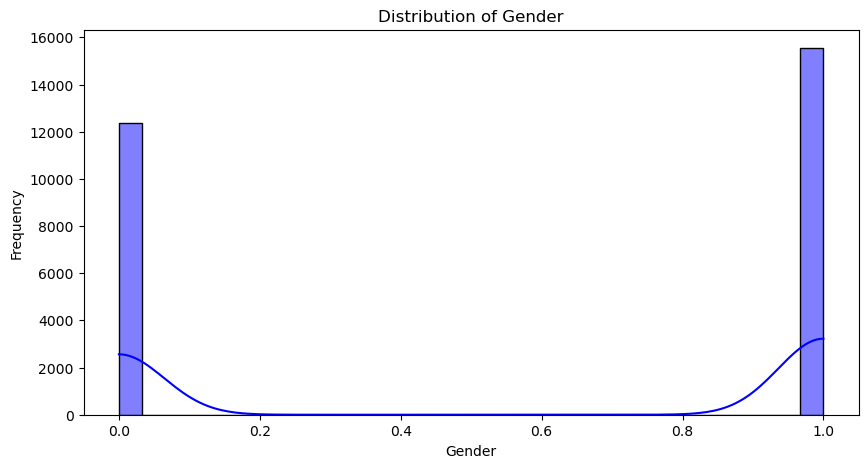

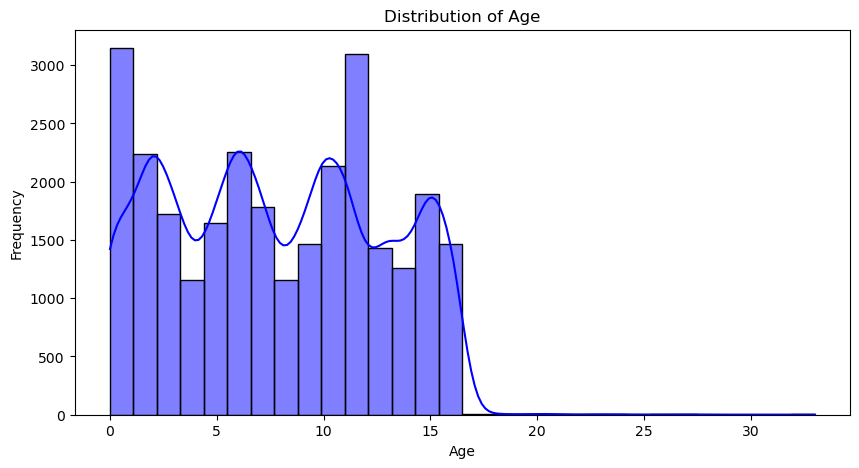

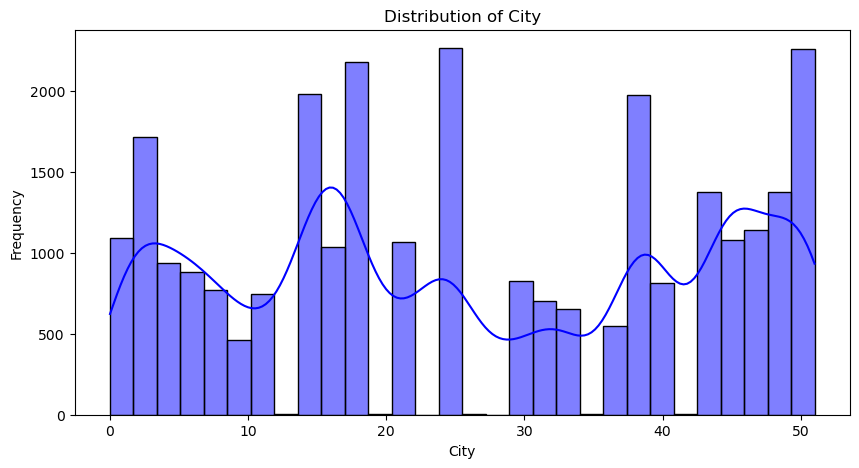

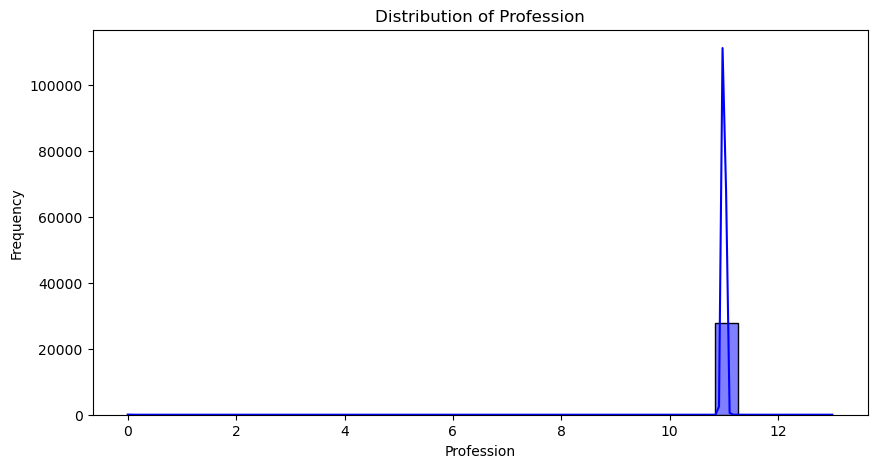

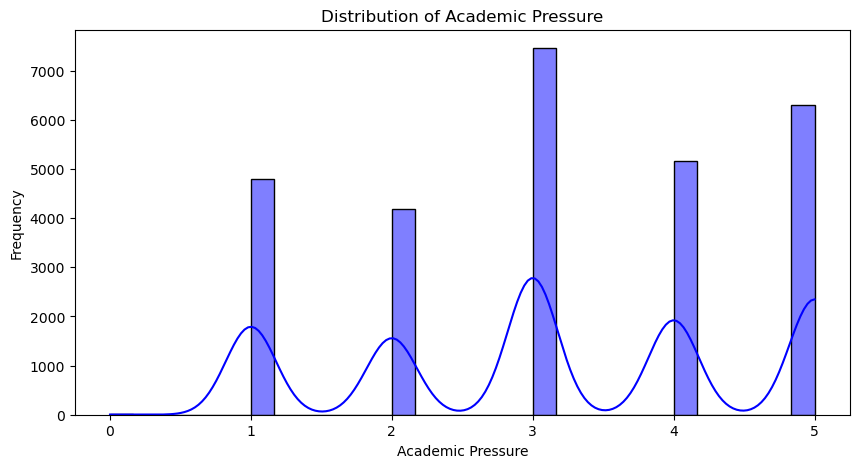

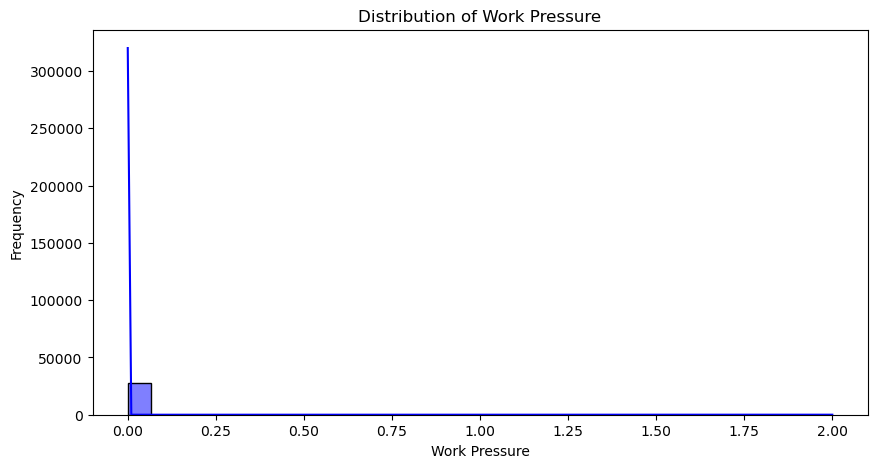

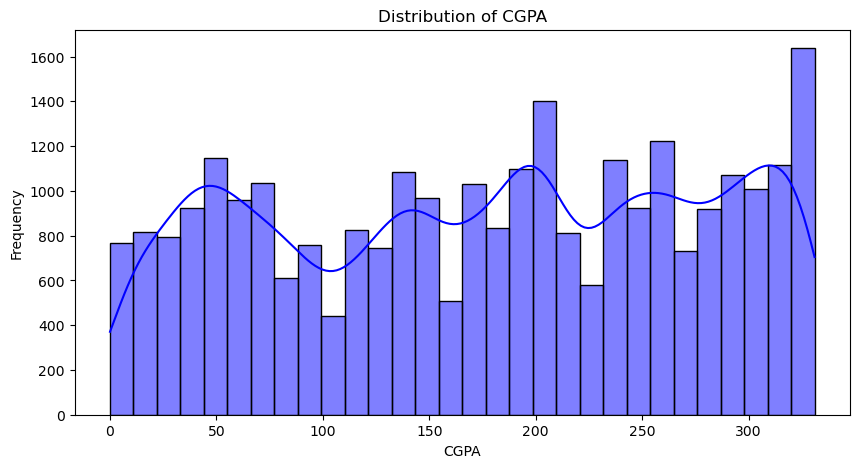

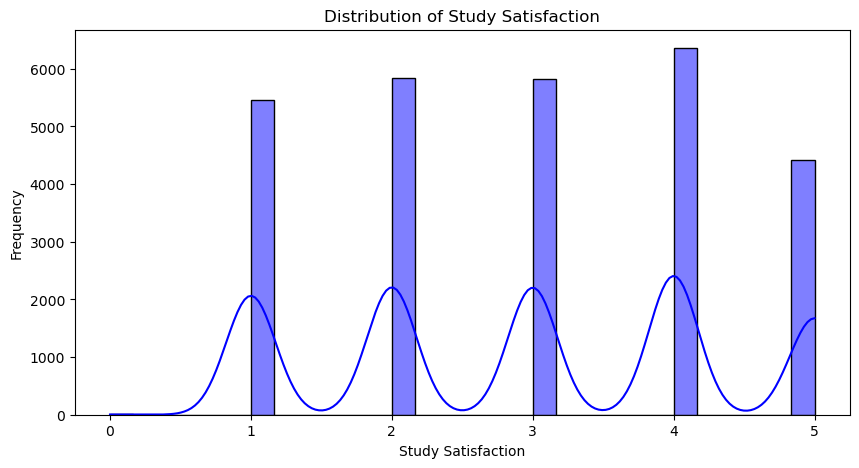

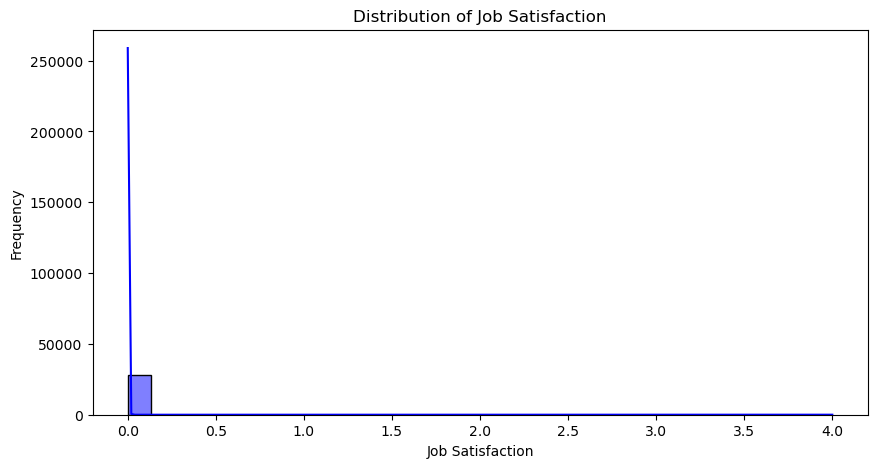

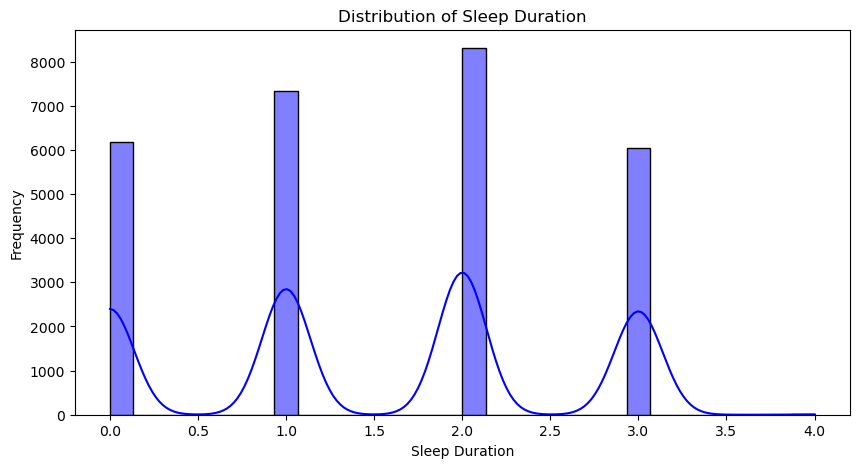

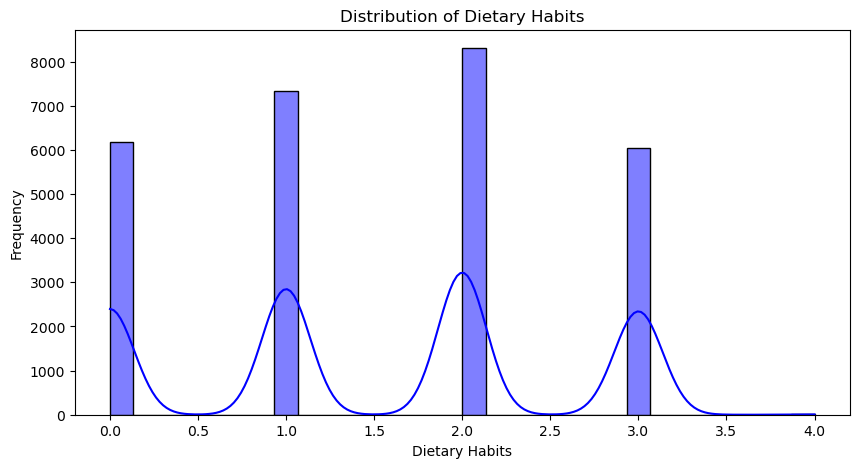

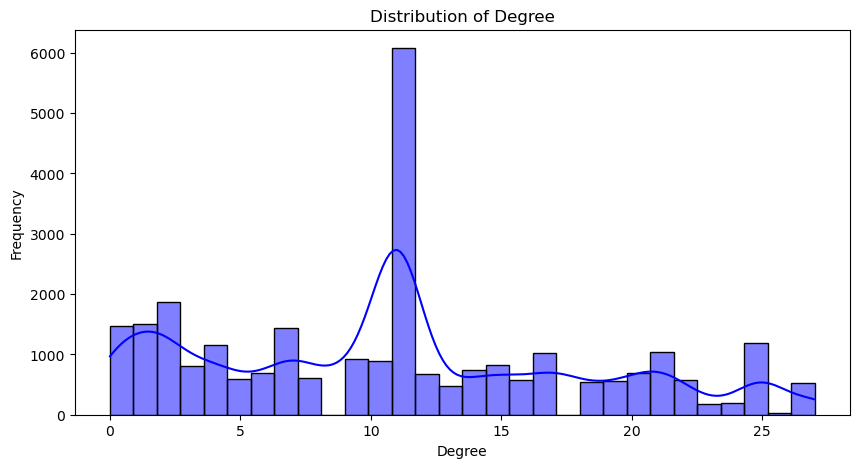

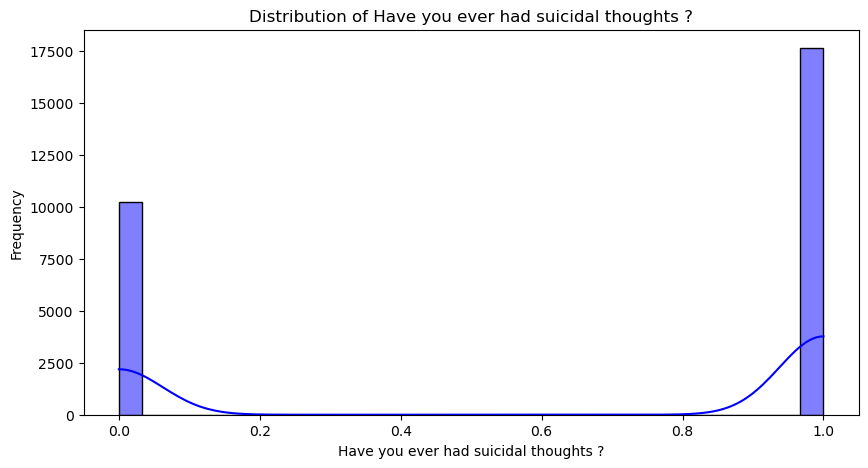

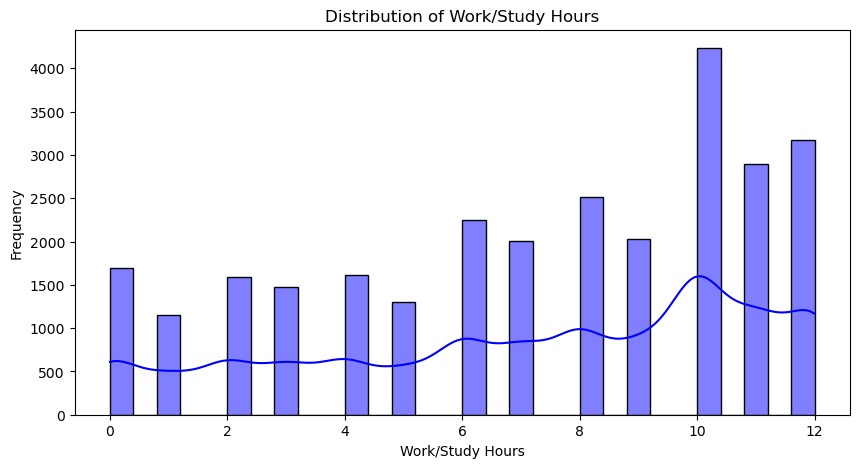

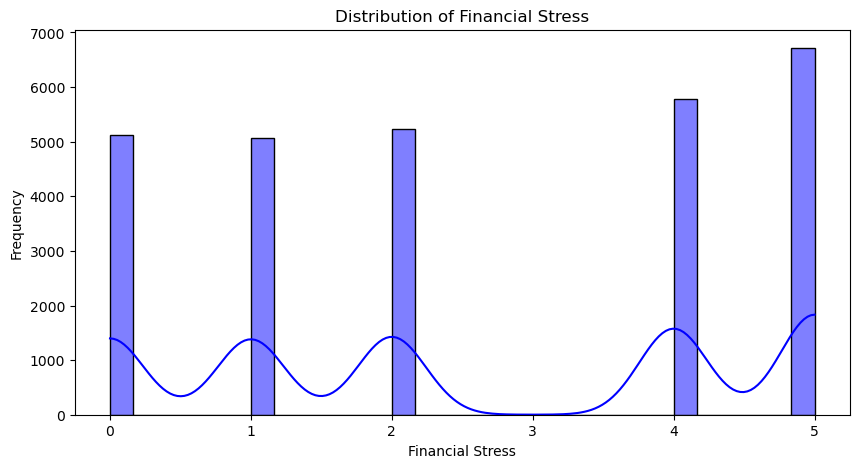

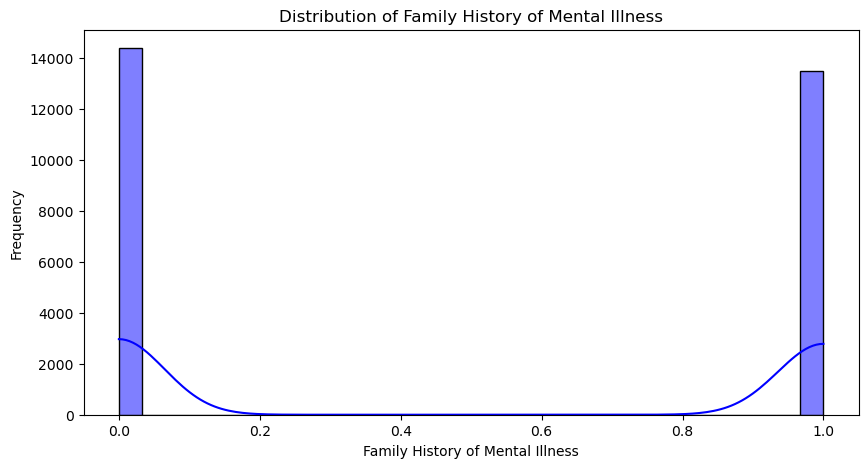

In [35]:
numerical_features = ["Gender","Age","City","Profession","Academic Pressure","Work Pressure","CGPA","Study Satisfaction","Job Satisfaction","Sleep Duration","Dietary Habits","Degree","Have you ever had suicidal thoughts ?","Work/Study Hours","Financial Stress","Family History of Mental Illness"]
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

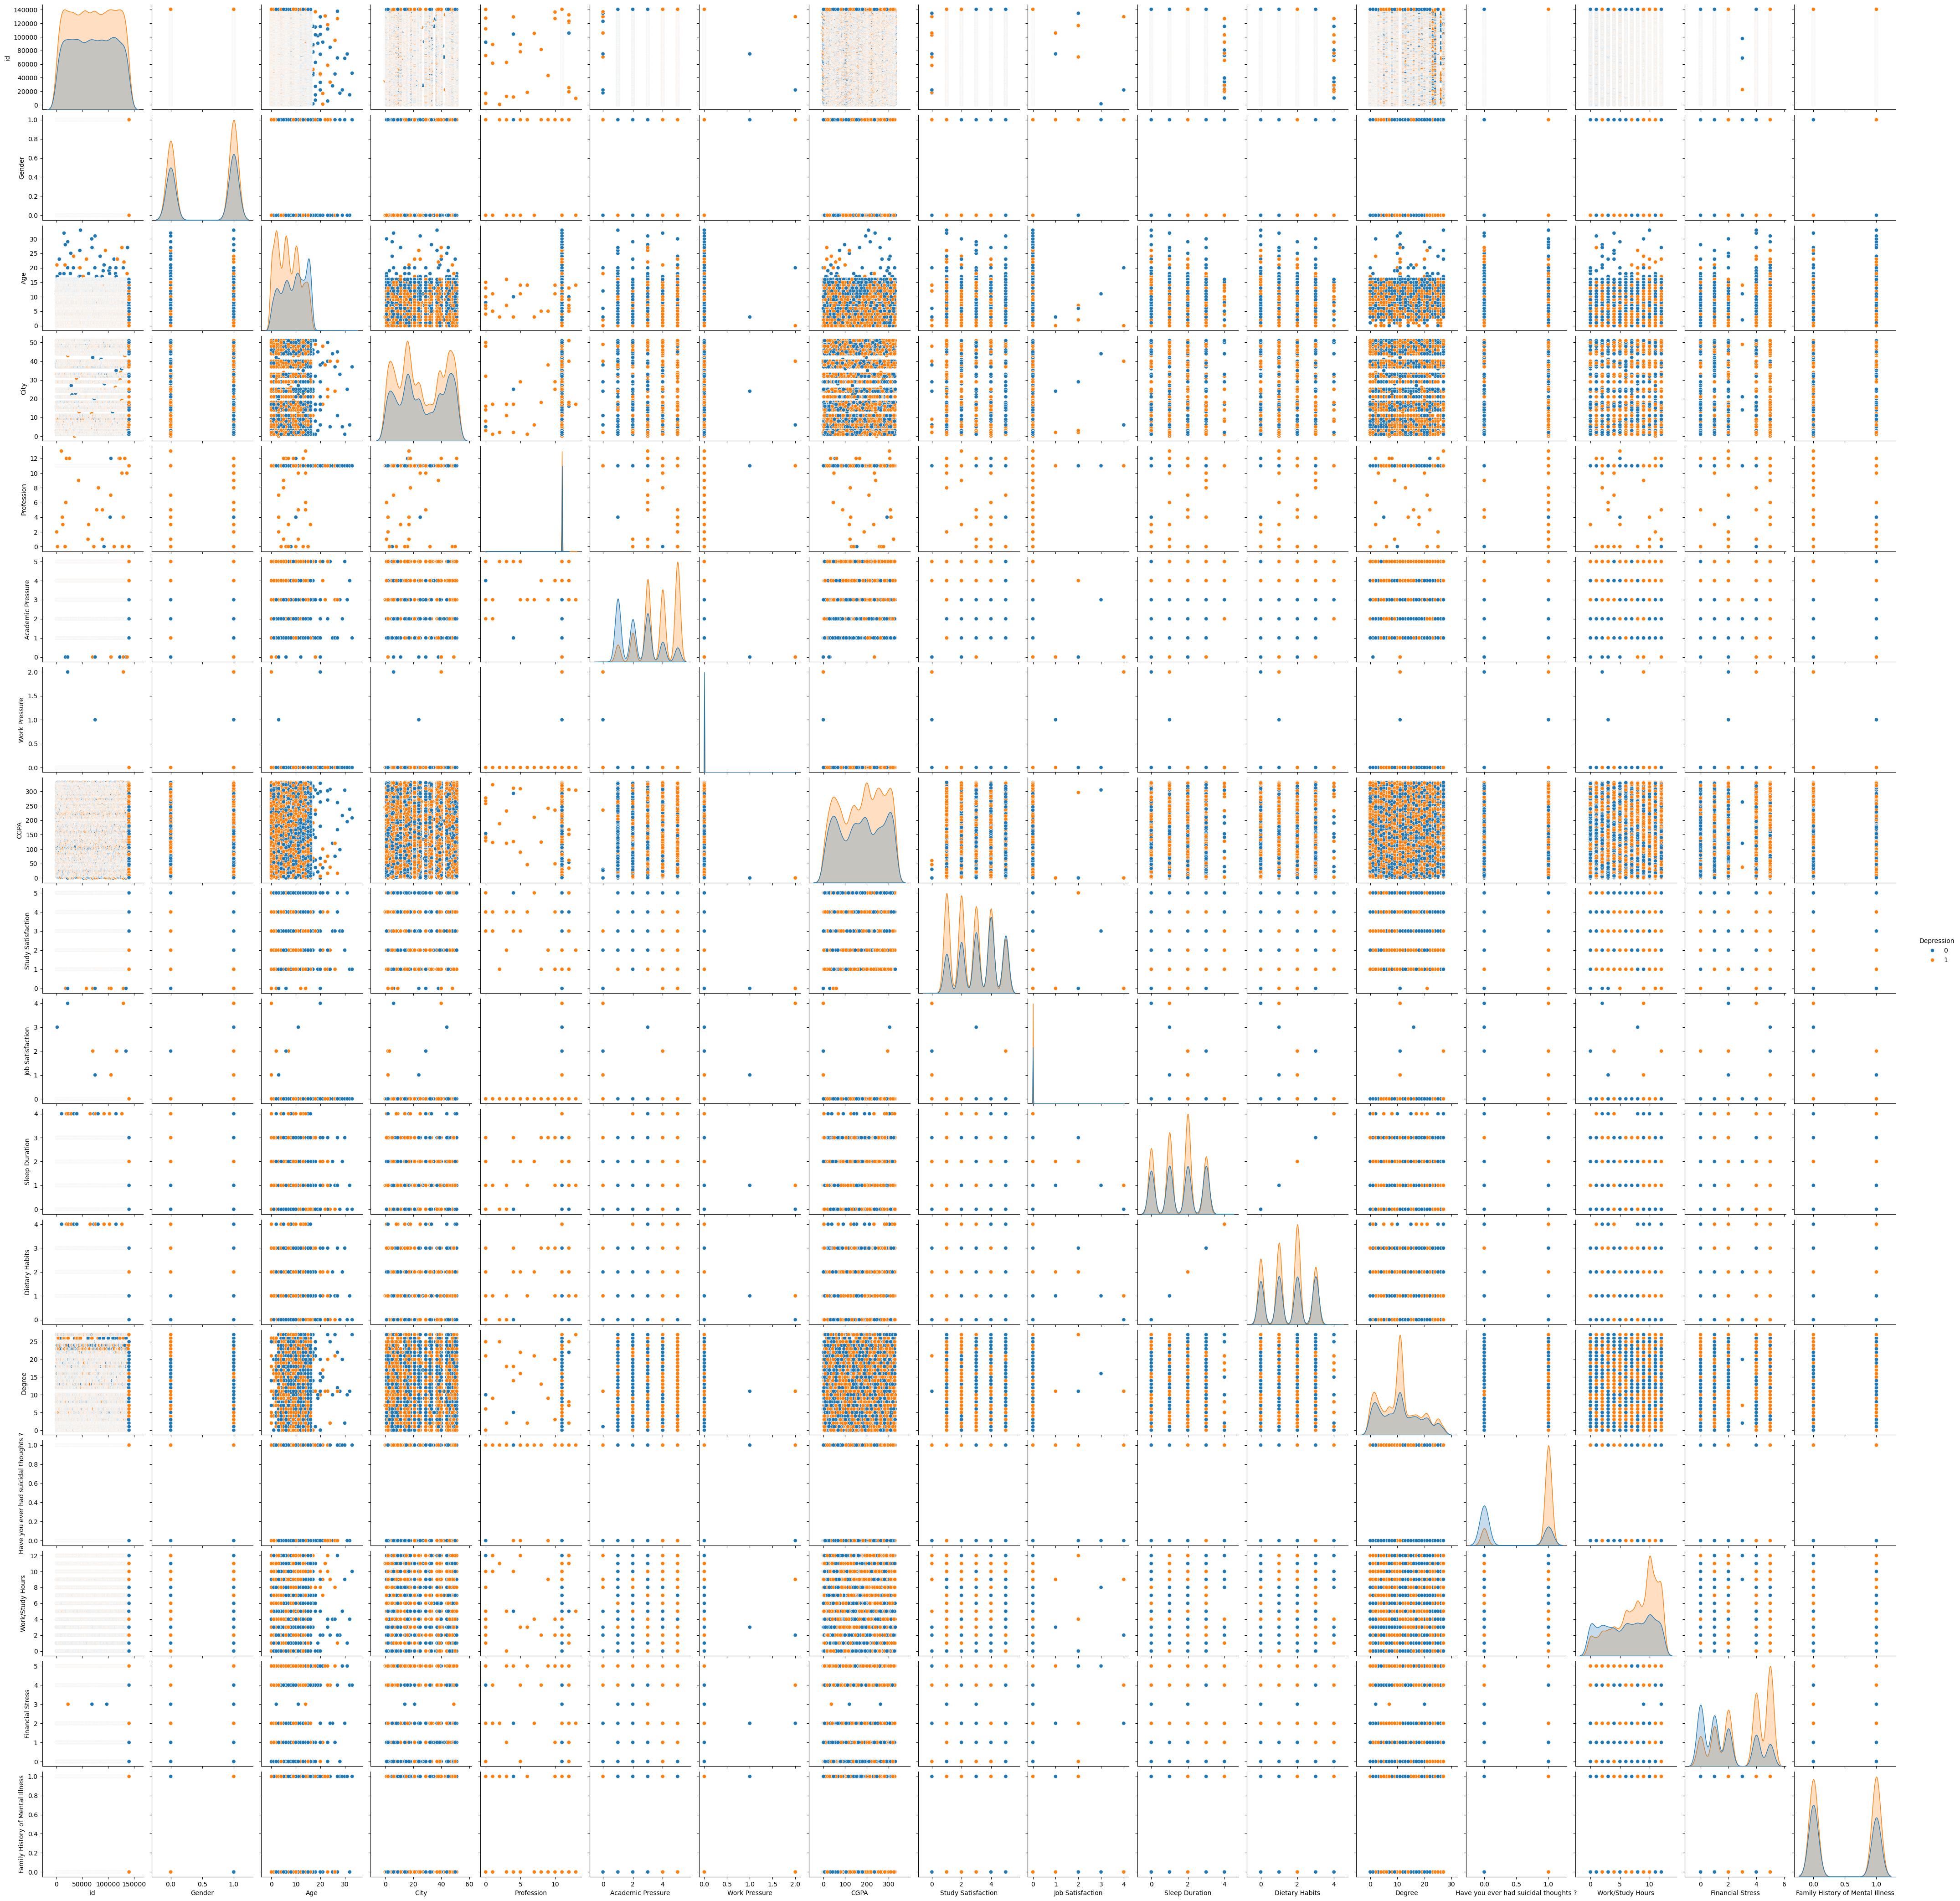

In [18]:
sns.pairplot(data,hue='Depression',diag_kind='kde')
plt.show()

In [104]:
df=pd.read_csv("Student Depression Dataset.csv")

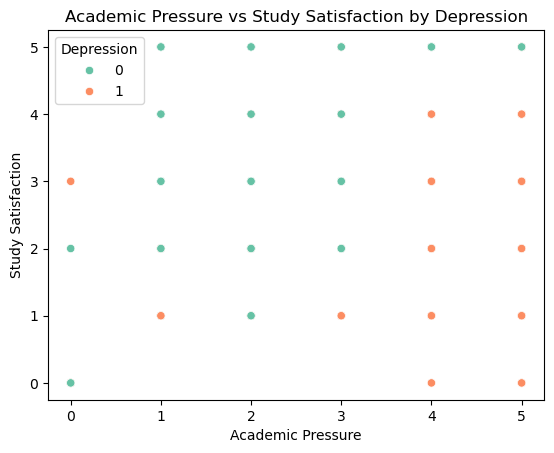

In [25]:
sns.scatterplot(data=df, x='Academic Pressure', y='Study Satisfaction', hue='Depression', palette='Set2')
plt.title('Academic Pressure vs Study Satisfaction by Depression')
plt.xlabel('Academic Pressure')
plt.ylabel('Study Satisfaction')
plt.legend(title='Depression')
# plt.savefig('Organic Carbon (%) vs pH Level by Soil Type.png')
plt.show()

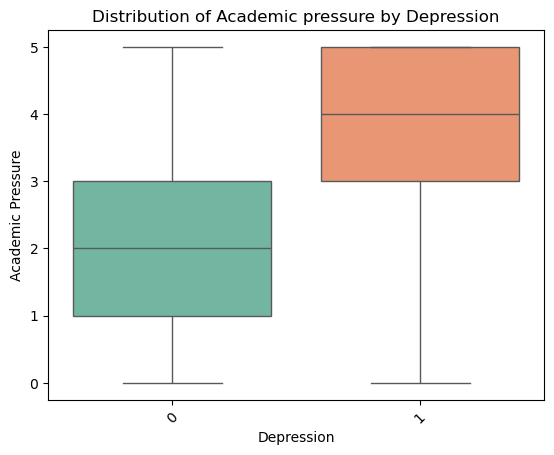

In [106]:
sns.boxplot(data=df, x='Depression', y="Academic Pressure", palette='Set2')
plt.title('Distribution of Academic pressure by Depression')
plt.xlabel('Depression')
plt.ylabel('Academic Pressure')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.savefig('Distribution of Academic Pressure by Depression.png')
plt.show()

In [17]:
x=data.drop(['Depression'],axis=1)
y=data['Depression']

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=200)

# LOGISTIC REGRESSION

In [213]:
from sklearn.linear_model import LogisticRegression

In [215]:
logistic_model=LogisticRegression()

In [217]:
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [219]:
logistic_model.score(x_train,y_train)

0.7653353814644137

In [221]:
logistic_model.score(x_test,y_test)

0.7524787958427905

# DECISION TREE

In [224]:
from sklearn.tree import DecisionTreeClassifier

In [226]:
dtree_model= DecisionTreeClassifier()

In [228]:
dtree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [230]:
dtree_model.score(x_train,y_train)

1.0

In [232]:
dtree_model.score(x_test,y_test)

0.767052920797993

# RANDOM FOREST

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
forest_model= RandomForestClassifier(n_estimators=50,random_state=20)

In [79]:
forest_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=20)

In [80]:
forest_model.score(x_train,y_train)

0.9996927803379416

In [82]:
forest_model.score(x_test,y_test)

0.8370565045992115

# K NEAREST NEIGHBOUR (KNN)

In [140]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
knn_model= KNeighborsClassifier()

In [90]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [92]:
knn_model.score(x_train,y_train)

0.7012800819252433

In [93]:
knn_model.score(x_test,y_test)

0.519053876478318

#SUPPORT VECTOR MECHANISM (SVM)

In [23]:
#from sklearn.svm import SVC

In [1]:
#svm=SVC(kernel='linear')
#svm.fit(x_train,y_train)
#svm.score(x_test,y_test)

In [3]:
#svm.score(x_train,y_train) 

In [5]:
#svm1=SVC(kernel='poly',degree=3,C=5,gamma='auto')  
#svm1.fit(x_train,y_train)
#svm1.score(x_test,y_test)

In [7]:
#svm1.score(x_train,y_train)

In [9]:
#svm2=SVC(kernel='sigmoid')
#svm2.fit(x_train,y_train)
#svm2.score(x_test,y_test)

In [11]:
#svm2.score(x_train,y_train)

In [13]:
#svm3=SVC(kernel='rbf')
#svm3.fit(x_train,y_train)
#svm3.score(x_test,y_test)

In [15]:
#svm3.score(x_train,y_train)

In [17]:
#svm4=SVC()
#svm4.fit(x_train,y_train)
#svm4.score(x_test,y_test)

# NAIVE BAYES (GaussianNB)

In [72]:
from sklearn.naive_bayes import GaussianNB

In [74]:
gaus_model=GaussianNB()

In [76]:
gaus_model.fit(x_train,y_train)

GaussianNB()

In [78]:
gaus_model.score(x_train,y_train)

0.7968766001024066

In [80]:
gaus_model.score(x_test,y_test)

0.7873611277027834

# ENSEMBLE MODEL

#### AdaBoost

In [82]:
from sklearn.ensemble import AdaBoostClassifier

In [84]:
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost= AdaBoostClassifier(n_estimators=400,learning_rate=0.3,random_state=10)

In [86]:
adaboost.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.3, n_estimators=400, random_state=10)

In [87]:
adaboost.score(x_train,y_train)

0.8461853558627752

In [88]:
adaboost.score(x_test,y_test)

0.8463743877672918

#### GradientBoosting

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
grad_model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.01,random_state=25)

In [96]:
grad_model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=25)

In [97]:
grad_model.score(x_train,y_train)

0.8225294418842806

In [275]:
grad_model.score(x_test,y_test)

0.8280970015529805

#### XGBClassifier

In [261]:
!pip install xgboost

In [265]:
xg_model=XGBClassifier()

In [267]:
from xgboost import XGBClassifier

In [269]:
xg_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [271]:
xg_model.score(x_train,y_train)

0.9343061955965182

In [273]:
xg_model.score(x_test,y_test)

0.8315613427308566

# CROSS VALIDATION

In [281]:
from sklearn.model_selection import KFold,StratifiedKFold
X=data.drop(['Depression'],axis=1)
y=data[['Depression']]

In [283]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    return model.score(x_test,y_test)
    # return accuracy_score(y_test, predictions)

In [287]:
fold = KFold(n_splits=6)
log_score = []
dt_score = []
rf_score = []
knn_score = []
svm_score = []
nb_score = []
adb_score = []
xg_score=[]
gr_score = []

for train_index, test_index in fold.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    log_score.append(get_score(LogisticRegression(), x_train, x_test, y_train, y_test))
    dt_score.append(get_score(DecisionTreeClassifier(max_depth=7), x_train, x_test, y_train, y_test))
    rf_score.append(get_score(RandomForestClassifier(random_state=34), x_train, x_test, y_train, y_test))
    knn_score.append(get_score(KNeighborsClassifier(), x_train, x_test, y_train, y_test))
    #svm_score.append(get_score(SVC(), x_train, x_test, y_train, y_test))
    nb_score.append(get_score(GaussianNB(), x_train, x_test, y_train, y_test))
    adb_score.append(get_score(AdaBoostClassifier(), x_train, x_test, y_train, y_test))
    xg_score.append(get_score(XGBClassifier(), x_train, x_test, y_train, y_test))
    gr_score.append(get_score(GradientBoostingClassifier(), x_train, x_test, y_train, y_test))

# You can now analyze the scores stored in the lists
print("Logistic Regression scores:",log_score)
print("Decision Tree scores:",dt_score)
print("Random Forest scores:",rf_score)
print("KNN scores:",knn_score)
print("Naive Bayes scores:",nb_score)
#print('SVM score: ',svm_score)
print("AdaBoost scores:",adb_score)
print("XGBoost scores:",xg_score)
print("Gradient Boosting scores:",gr_score)

Logistic Regression scores: [0.6839389378628252, 0.7380645161290322, 0.7313978494623656, 0.7281720430107527, 0.7363440860215054, 0.7281720430107527]
Decision Tree scores: [0.7776822188776608, 0.833763440860215, 0.8352688172043011, 0.832258064516129, 0.8286021505376344, 0.8043010752688172]
Random Forest scores: [0.8260589120619222, 0.8395698924731183, 0.8367741935483871, 0.8344086021505376, 0.8391397849462365, 0.8361290322580646]
KNN scores: [0.5813803483121909, 0.5675268817204301, 0.46946236559139787, 0.5333333333333333, 0.5806451612903226, 0.5946236559139785]
Naive Bayes scores: [0.7972479036766287, 0.7909677419354839, 0.7888172043010753, 0.7825806451612903, 0.7989247311827957, 0.8152688172043011]
AdaBoost scores: [0.8288540098903462, 0.8503225806451613, 0.8425806451612903, 0.8402150537634409, 0.8419354838709677, 0.8470967741935483]
XGBoost scores: [0.819823693829284, 0.8339784946236559, 0.8283870967741935, 0.8268817204301075, 0.8290322580645161, 0.8258064516129032]
Gradient Boosting 

In [144]:
fold = StratifiedKFold(n_splits=6)
log_score = []
dt_score = []
rf_score = []
knn_score = []
#svm_score = []
nb_score = []
adb_score = []
xg_score=[]
gr_score = []

for train_index, test_index in fold.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    log_score.append(get_score(LogisticRegression(), x_train, x_test, y_train, y_test))
    dt_score.append(get_score(DecisionTreeClassifier(max_depth=7), x_train, x_test, y_train, y_test))
    rf_score.append(get_score(RandomForestClassifier(random_state=34), x_train, x_test, y_train, y_test))
    knn_score.append(get_score(KNeighborsClassifier(), x_train, x_test, y_train, y_test))
    #svm_score.append(get_score(SVC(), x_train, x_test, y_train, y_test))
    nb_score.append(get_score(GaussianNB(), x_train, x_test, y_train, y_test))
    adb_score.append(get_score(AdaBoostClassifier(), x_train, x_test, y_train, y_test))
    xg_score.append(get_score(XGBClassifier(), x_train, x_test, y_train, y_test))
    gr_score.append(get_score(GradientBoostingClassifier(), x_train, x_test, y_train, y_test))

# Now we can analyze the scores as needed
print("Logistic Regression Scores:",log_score)
print("Decision Tree Scores:",dt_score)
print("Random Forest Scores:",rf_score)
print("K-Nearest Neighbors Scores:",knn_score)
#print("SVM Scores:",svm_score)
print("Naive Bayes Scores:",nb_score)
print("AdaBoost Scores:",adb_score)
print("XGBoost scores:",xg_score)
print("Gradient Boosting Scores:",gr_score)

Logistic Regression Scores: [0.7387658568049882, 0.7303225806451613, 0.7369892473118279, 0.7823655913978494, 0.7619354838709678, 0.7391397849462366]
Decision Tree Scores: [0.8064932272629542, 0.8352688172043011, 0.8344086021505376, 0.8329032258064516, 0.8309677419354838, 0.806236559139785]
Random Forest Scores: [0.8236938292840249, 0.8410752688172043, 0.8417204301075268, 0.8339784946236559, 0.8412903225806452, 0.8318279569892473]
K-Nearest Neighbors Scores: [0.5854654912921953, 0.4146236559139785, 0.506021505376344, 0.501505376344086, 0.49053763440860215, 0.5853763440860215]
Naive Bayes Scores: [0.7953128359492583, 0.7924731182795699, 0.7941935483870968, 0.7875268817204301, 0.7959139784946236, 0.8152688172043011]
AdaBoost Scores: [0.5854654912921953, 0.8462365591397849, 0.8443010752688173, 0.8419354838709677, 0.8410752688172043, 0.5853763440860215]
Gradient Boosting Scores: [0.8095033326166415, 0.847741935483871, 0.844516129032258, 0.8417204301075268, 0.8415053763440861, 0.707096774193

Selected Model Creation Algorithm is RandomForestClassifier

#### GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [36]:
model_params={'model':AdaBoostClassifier(),'params':{'n_estimators':[50,100,200],'learning_rate':[.3,0.5,1],'random_state':[1,2,5]}}

In [37]:
gds= GridSearchCV(model_params['model'],model_params['params'],cv=5,return_train_score=True)

In [38]:
gds.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 1],
                         'n_estimators': [50, 100, 200],
                         'random_state': [1, 2, 5]},
             return_train_score=True)

In [43]:
gds.best_score_

0.8438812083973375

In [45]:
gds.best_params_

{'learning_rate': 0.3, 'n_estimators': 200, 'random_state': 1}

In [49]:
gds.predict([[1.5,3,6.6,1,3,6,8,4,6,9,7,2,5,7,8,1,2.4,]])

array([1], dtype=int64)

In [51]:
y_pred=gds.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [54]:
y_test

23424    1
3369     1
24923    1
6687     0
12242    0
        ..
14686    0
17528    0
5235     0
10398    1
10595    1
Name: Depression, Length: 8371, dtype: int64

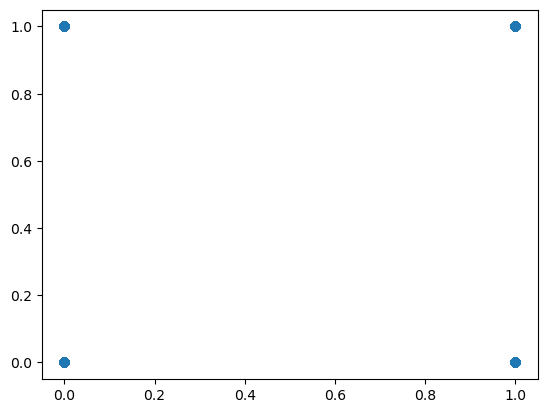

In [56]:
plt.scatter(y_test,y_pred)

In [7]:
pd.DataFrame(y_test,y_pred)

NameError: name 'pd' is not defined

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [62]:
accuracy_score(y_test,y_pred)

0.8484052084577709

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      3471
           1       0.86      0.88      0.87      4900

    accuracy                           0.85      8371
   macro avg       0.85      0.84      0.84      8371
weighted avg       0.85      0.85      0.85      8371



In [66]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[2769,  702],
       [ 567, 4333]], dtype=int64)

In [68]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[2769,  702],
       [ 567, 4333]], dtype=int64)

In [70]:
import seaborn as sns

Text(33.22222222222222, 0.5, 'predicted')

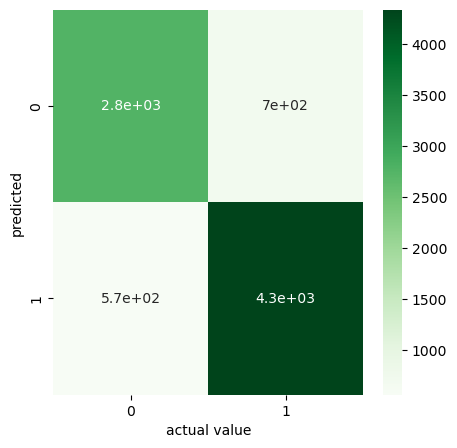

In [76]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,cmap='Greens')
plt.xlabel('actual value')
plt.ylabel('predicted')

In [27]:
def run_model():
    id=float(input('Enter id content (id of students): '))
    Gender=input("Enter the gender ('Male','Female'): ")
    Age=float(input('Enter the age(Range:18.0-33.0): '))
    City=input("Enter the City('visakhapatanam','banglore','srinagar','varanasi','jaipur','surat','ludhiana','faridabad','ludhiana','patna'): ")
    Profession=input("Enter profession ('student',student','stuent','student','student','student','student','student','student','student'): ")
    academic_pressure = float(input("Enter the academic pressure (Range: 2.0-5.0): "))
    work_pressure = input("Enter the Work pressure (0.0): ")
    CGPA=float(input('Enter the CGPA(Range:5.59-9.40): '))
    study_satisfaction = float(input("Enter the study satisfaction (Range: 1.0-2.0): "))
    job_satisfaction = float(input("Enter the job satisfaction (Range: 0.0-5.0): "))
    Sleep_Duration = input('Enter the Sleep Duration (e.g., "5-6 hours", "7-8 hours", "less than 5 hours"): ')
    Dietary_Habits = input("Enter your Dietary Habits (e.g., 'Healthy', 'Moderate', 'Unhealthy'): ") 
    Degree = input("Enter your degree (e.g., 'B.pharm', 'BSC', 'BA', 'BCA', 'M.tech', 'Class 12', 'MSc', 'MD'): ")
    Have_you_ever_had_suicidal_thoughts = input("Have you ever had suicidal thoughts? (yes/no): ")
    work_study_hours = float(input("Enter Work/Study hours (Range: 1.0-12.0): "))
    financial_stress = float(input("Enter financial stress (Range: 1.0-5.0): "))
    family_history_of_mental_illness = input("Enter family history of mental illness (yes/no): ")




    Gender_encoded = le.transform([Gender])[0]
    City_encoded = le.transform([city])[0]
    Profession_Class_encoded = le.transform([Profession_Class])[0]
    sleep_duration_encoded = le.transform([sleep_duration])[0]
    Dietary_Habits_encoded = le.transform([Dietary_Habits])[0]
    Degree_encoded = le.transform([Degree_encoded])[0]
    suicidal_thoughts_encoded = le.transform([suicidal_thoughts])[0]
    family_history_of_mental_illness_encoded = le.transform([family_history_of_mental_illness])[0] 
    
    features = np.array([[id, Gender, Age, City, Profession, Academic_pressure, Work_Pressure, CGPA,Study_satisfaction, job_satisfaction, Sleep_Duration, Dietary_Habits, Degree, Have_you_ever_had_suicidal_thoughts, Work_study_hours, financial_Stress, family_history_of_mental_illness_encoded]])
    Result = gds.predict(features)
    print(Result)
    

    if Result == 0:
        print('The predicted students depression is no depression')
    elif Result == 1:
        print('The predicted students depression is depression')  
            
run_model()

Enter id content (id of students):  2
Enter the gender ('Male','Female'):  Male
Enter the age(Range:18.0-33.0):  18.0
Enter the City('visakhapatanam','banglore','srinagar','varanasi','jaipur','surat','ludhiana','faridabad','ludhiana','patna'):  surat
Enter profession ('student',student','stuent','student','student','student','student','student','student','student'):  student
Enter the academic pressure (Range: 2.0-5.0):  2.0
Enter the Work pressure (0.0):  0.0
Enter the CGPA(Range:5.59-9.40):  9.40
Enter the study satisfaction (Range: 1.0-2.0):  1.0
Enter the job satisfaction (Range: 0.0-5.0):  5.0
Enter the Sleep Duration (e.g., "5-6 hours", "7-8 hours", "less than 5 hours"):  less tha 5 hours
Enter your Dietary Habits (e.g., 'Healthy', 'Moderate', 'Unhealthy'):  healthy
Enter your degree (e.g., 'B.pharm', 'BSC', 'BA', 'BCA', 'M.tech', 'Class 12', 'MSc', 'MD'):  BA
Have you ever had suicidal thoughts? (yes/no):  Yes
Enter Work/Study hours (Range: 1.0-12.0):  1.0
Enter financial stress

ValueError: y contains previously unseen labels: 'Male'